<a href="https://colab.research.google.com/github/trong-shen/Python/blob/master/Assignment_3_Financial_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Assignment - Financial Time series Model

### Q1 Install pandas-datareader library and Quandle


In [0]:
!pip install pandas-datareader
!pip install Quandl
#running on linux machine





### Q2 Download data
Download the adjusted close price for the following companies using the code below:

In [0]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
import os
 

In [0]:
import quandl

In [0]:
# Get the data from Quandl 
# You need to register an account in quandl.com and find your specific API key under the account settings 
quandl.ApiConfig.api_key = "xPPJmPBdwpExW2qtnkyu"
#start 2013, 2, 28
#end 2018, 2, 28
data = quandl.get_table('WIKI/PRICES', 
                        qopts = { 'columns': ['ticker', 'date', 'close'] }, 
                        ticker = ['AAPL', 'INTC', 'EBAY', 'AMZN'], 
                        date = { 'gte': '2013-02-28', 'lte': '2018-02-28' })

#this is quandl's library get table. We can choose some options. Ticker is the company, date of the stock, close is the price when it closes


#It is possible to download it from other places such as Yahoo, but we prefer Quandle
#start = datetime.datetime(2012, 7, 31)
#end = datetime.datetime(2017, 6, 30)
#aapl = web.DataReader("AAPL", 'yahoo', start, end)['Close']
#aapl

#aapl = web.DataReader("AAPL", 'google', start, end)['Close']



#You can filter data for each of the companies as follows:
#data.loc[data['ticker']=='AMZN']

In [0]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.info()

data.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2018-02-28 to 2013-02-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  5033 non-null   object 
 1   close   5033 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.0+ KB


,ticker,close
date,,
2013-03-06,AAPL,425.662
2013-03-05,AAPL,431.144
2013-03-04,AAPL,420.050
2013-03-01,AAPL,430.470
2013-02-28,AAPL,441.400


In [0]:
#extract each company's stock
aapl = data.loc[data['ticker']=='AAPL']['close']
intc = data.loc[data['ticker']=='INTC']['close']
ebay = data.loc[data['ticker']=='EBAY']['close']
amzn = data.loc[data['ticker']=='AMZN']['close']

aapl.tail()

date
2013-03-06    425.662
2013-03-05    431.144
2013-03-04    420.050
2013-03-01    430.470
2013-02-28    441.400
Name: close, dtype: float64

### Q3 Select the adjusted monthend close price for each of the stocks.

(3 marks) Get the close price for the 60 months period for the 4 stocks and correctly select out the last business day of the month.
more information: https://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [0]:
# Resampling the data to get end of business month data points
aapl_monthend = aapl.resample('BM').last() # Find the ri
intc_monthend = intc.resample('BM').last()
ebay_monthend = ebay.resample('BM').last()
amzn_monthend = amzn.resample('BM').last()


aapl_monthend.head()


date
2013-02-28    441.400
2013-03-29    442.660
2013-04-30    442.780
2013-05-31    449.735
2013-06-28    396.530
Freq: BM, Name: close, dtype: float64

### Q4 Plotting Autocorrelations

(2 marks) Use pandas `autocorrelation_plot()` function to plot the autocorrelation of the monthend close prices of each of the stocks.  Are they autocorrelated?  Why or why not?

<Figure size 864x432 with 0 Axes>

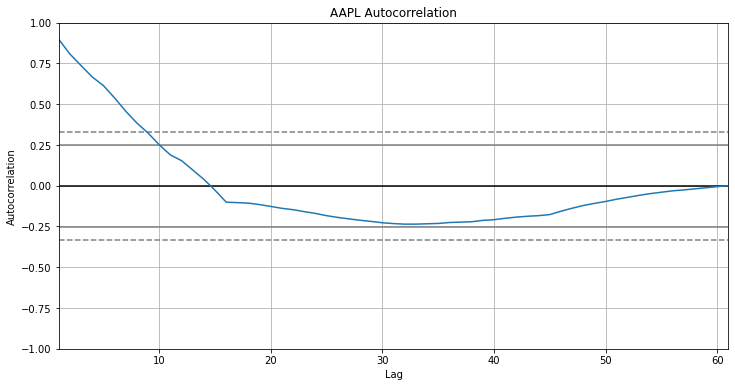

<Figure size 864x432 with 0 Axes>

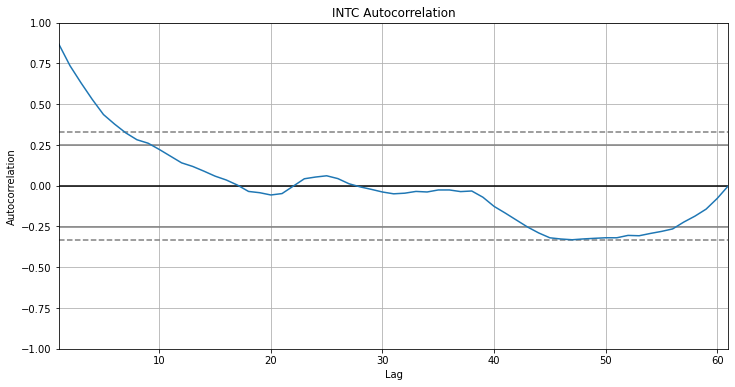

<Figure size 864x432 with 0 Axes>

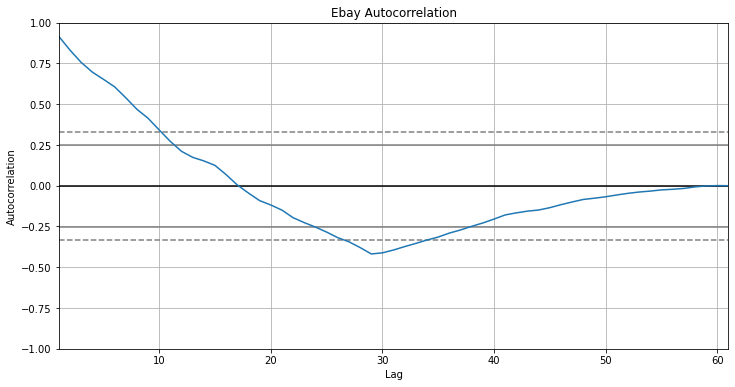

<Figure size 864x432 with 0 Axes>

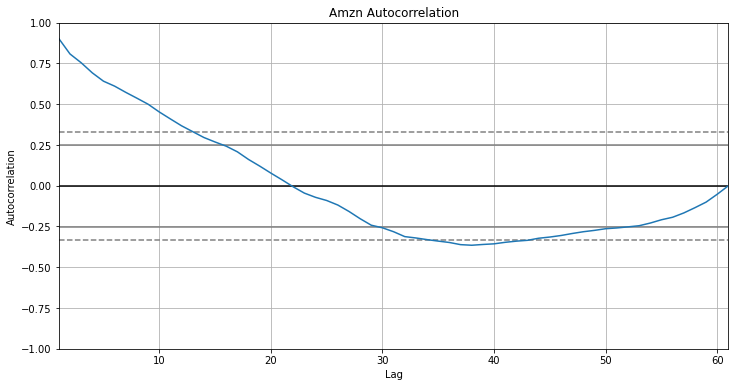

<Figure size 864x432 with 0 Axes>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6),facecolor='w')

plt.figure()
autocorrelation_plot(aapl_monthend)
plt.title('AAPL Autocorrelation')
plt.figure()

plt.figure()
autocorrelation_plot(intc_monthend)
plt.title('INTC Autocorrelation')
plt.figure()

plt.figure()
autocorrelation_plot(ebay_monthend)
plt.title('Ebay Autocorrelation')
plt.figure()

plt.figure()
autocorrelation_plot(amzn_monthend)
plt.title('Amzn Autocorrelation')
plt.figure()

#After 9 months there is no longer any correlation.
#0.30 is the significance level
#You can only use only about 9 months of data to predict your stock price.

# Your code here
# Your comments here

Q2 Answers: For all 4 stocks, they all have different significant autocorrelation months:
* Apple Stocks: Within 8 months
* Intel Stocks: within 6 months
* Ebay Stocks: Within 10 months
* Amazon Stocks: Within 12 months

THe dotted lines show the signifcant range of autocorrelation 


Text(0.5, 1.0, 'A Lag Plot with 1 period of lag')

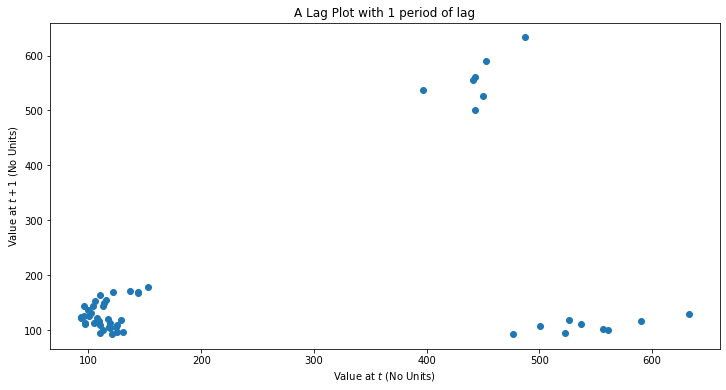

In [0]:
# The lag plot shows that at 9 month lag data is someone correlated. 

aLagPlot = pd.plotting.lag_plot(series=aapl_monthend, lag=9,facecolor='w' )
aLagPlot.set_ylabel("Value at ${t+1}$ (No Units)")
aLagPlot.set_xlabel("Value at $t$ (No Units)")
aLagPlot.set_title("A Lag Plot with 1 period of lag")

### Q5 Monthly Returns
(2 marks) Calculate the monthly return over the period for each stock using the “shift trick” on the lecture slide titled Shifting (Note: you should end up with a time series 59 months long)


In [0]:
#@title Default title text
#Calculate monthly returns for each stock
aapl_returns = (aapl_monthend/aapl_monthend.shift(1))-1;
intc_returns = (intc_monthend/intc_monthend.shift(1))-1;
ebay_returns = (ebay_monthend/ebay_monthend.shift(1))-1;
amzn_returns = (amzn_monthend/amzn_monthend.shift(1))-1;

aapl_returns.dropna(0,True)
intc_returns.dropna(0,True)
ebay_returns.dropna(0,True)
amzn_returns.dropna(0,True)

aapl_returns.name = 'AAPL'
intc_returns.name='INTC'
ebay_returns.name='ebay'
amzn_returns.name='amzn'

aapl_returns.count()
intc_returns.count()
ebay_returns.count()
amzn_returns.count()

# aapl_returns

#try to make use of pd.shift() by shift one and you should receive the value. 
#We can use scatter matrix between correlation between two column separately 
#Remove non value

aapl_returns.head()

date
2013-03-29    0.002855
2013-04-30    0.000271
2013-05-31    0.015708
2013-06-28   -0.118303
2013-07-31    0.141225
Freq: BM, Name: AAPL, dtype: float64

### Q6 Plotting Return Correlations
(3 marks) 
Create a table that rows are dates for all above companies, and columns are returns from different companies to be able to compare them.

Correctly draw autocorrelation plots, state whether or not they are autocorrelated. In addition, state whether or not monthly returns are correlated among companies (you may use scatter matrix) and find out which companies are the most and the least correlated in terms of their monthly returns. You may use **matplotlib.pyplot.pcolor** for better visualization of the correlation coefficients.

<Figure size 864x432 with 0 Axes>

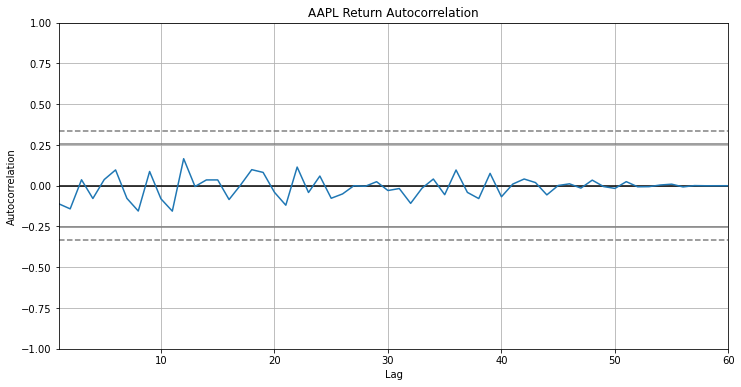

<Figure size 864x432 with 0 Axes>

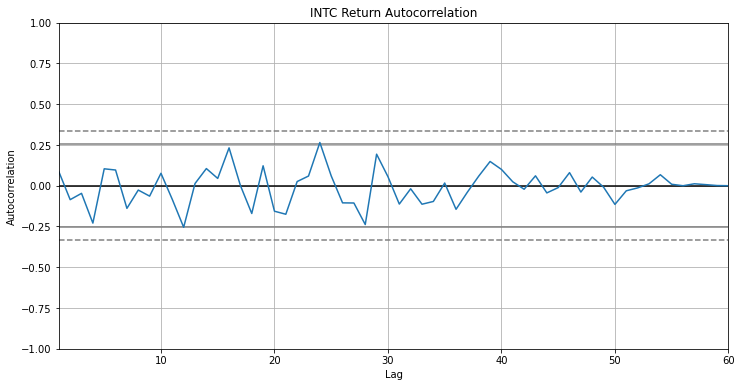

<Figure size 864x432 with 0 Axes>

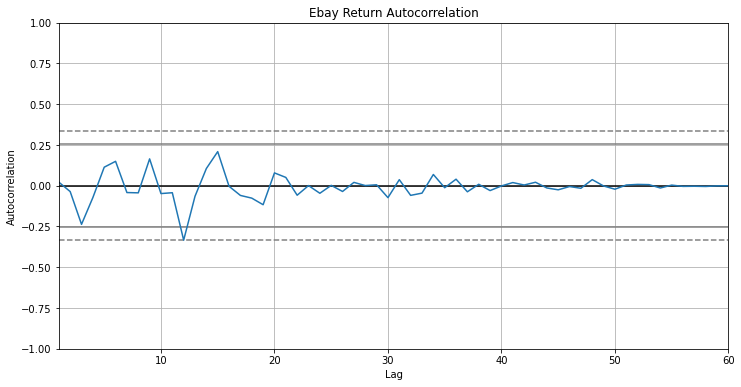

<Figure size 864x432 with 0 Axes>

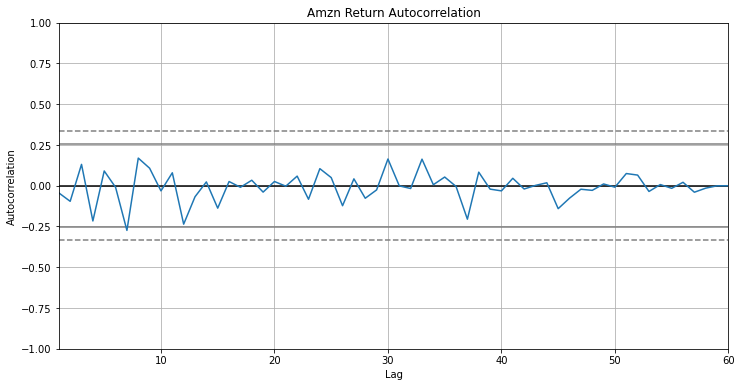

<Figure size 864x432 with 0 Axes>

In [0]:
np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6),facecolor='w')

plt.figure()
autocorrelation_plot(aapl_returns)
plt.title('AAPL Return Autocorrelation')
plt.figure()

plt.figure()
autocorrelation_plot(intc_returns)
plt.title('INTC Return Autocorrelation')
plt.figure()

plt.figure()
autocorrelation_plot(ebay_returns)
plt.title('Ebay Return Autocorrelation')
plt.figure()

plt.figure()
autocorrelation_plot(amzn_returns)
plt.title('Amzn Return Autocorrelation')
plt.figure()

##Monthly return for all 4 stocks are not significantly auto-correlated since they have autocorrleation between the dotted lines for all lag.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68fa0089e8>,
      dtype=object)

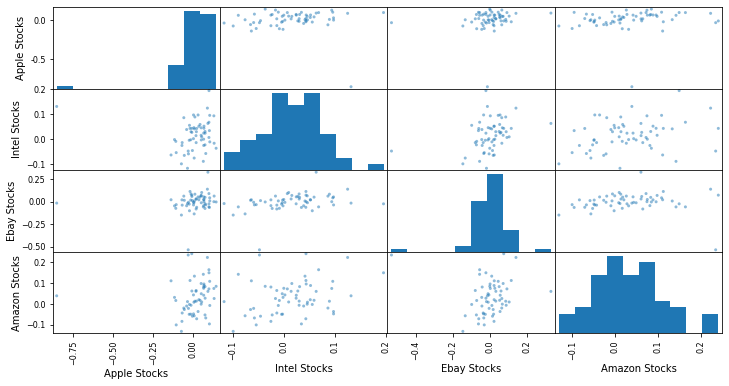

In [0]:
keys=['Apple Stocks','Intel Stocks','Ebay Stocks','Amazon Stocks'];
stocks_monthend=pd.concat([aapl_returns,intc_returns,ebay_returns,amzn_returns],axis=1, keys=keys)
from pandas.plotting import scatter_matrix
scatter_matrix(stocks_monthend)



               Apple Stocks  Intel Stocks  Ebay Stocks  Amazon Stocks
Apple Stocks       1.000000     -0.040996     0.141972       0.140967
Intel Stocks      -0.040996      1.000000     0.346122       0.297287
Ebay Stocks        0.141972      0.346122     1.000000       0.016188
Amazon Stocks      0.140967      0.297287     0.016188       1.000000


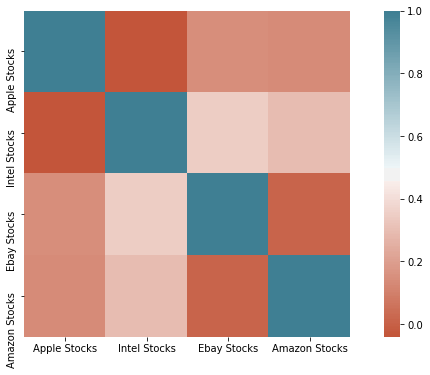

In [0]:
import seaborn as sns

sns.heatmap(stocks_monthend.corr(),cmap=sns.diverging_palette(20,220,n=200),square=True)
print(stocks_monthend.corr())

# All correlation is very weak with Intel and Ebay stock seems to have the highest correlation coefficient of **+0.346**.